In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/dvschultz/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

fatal: destination path 'stylegan2-ada-pytorch' already exists and is not an empty directory.
/content/stylegan2-ada-pytorch


In [ ]:
# Install compatible torch stack
!pip uninstall -y torch torchvision torchaudio numpy tensorboard jax jaxlib tensorflow
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2
!pip install numpy==1.24.4
!pip install tensorboard==2.11.2  # lightweight
!pip install click requests tqdm pyspng imageio-ffmpeg ninja
!apt install -y libgl1
!pip install opensimplex


Found existing installation: torch 2.0.1
Uninstalling torch-2.0.1:
  Successfully uninstalled torch-2.0.1
Found existing installation: torchvision 0.15.2
Uninstalling torchvision-0.15.2:
  Successfully uninstalled torchvision-0.15.2
Found existing installation: torchaudio 2.0.2
Uninstalling torchaudio-2.0.2:
  Successfully uninstalled torchaudio-2.0.2
Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: tensorboard 2.11.2
Uninstalling tensorboard-2.11.2:
  Successfully uninstalled tensorboard-2.11.2
  Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchvision-0.15.2-cp311-cp311-manylinux1_x86_64.whl.metadata (11 kB)
  Using cached torchaudio-2.0.2-cp311-cp311-manylinux1_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached torch-2.0.1-cp311-cp311-manylinux1_x86_64.whl (619.9 MB)
Using cache

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires jax>=0.4.27, which is not installed.
chex 0.1.89 requires jaxlib>=0.4.27, which is not installed.
orbax-checkpoint 0.11.16 requires jax>=0.5.0, which is not installed.
flax 0.10.6 requires jax>=0.5.1, which is not installed.
dopamine-rl 4.1.2 requires jax>=0.1.72, which is not installed.
dopamine-rl 4.1.2 requires jaxlib>=0.1.51, which is not installed.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.

  Using cached tensorboard-2.11.2-py3-none-any.whl.metadata (1.9 kB)
Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1 is already the newest version (1.4.0-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import torch
import numpy
print(torch.__version__)
print(numpy.__version__)

2.0.1+cu117
2.0.2


In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = '/content/drive/MyDrive/cropped_faces_combined_dataset.zip'  # Change to your actual zip file path
extract_to = './Dataset'  # Destination folder

# Create destination folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted files to '{extract_to}'")


Extracted files to './Dataset'


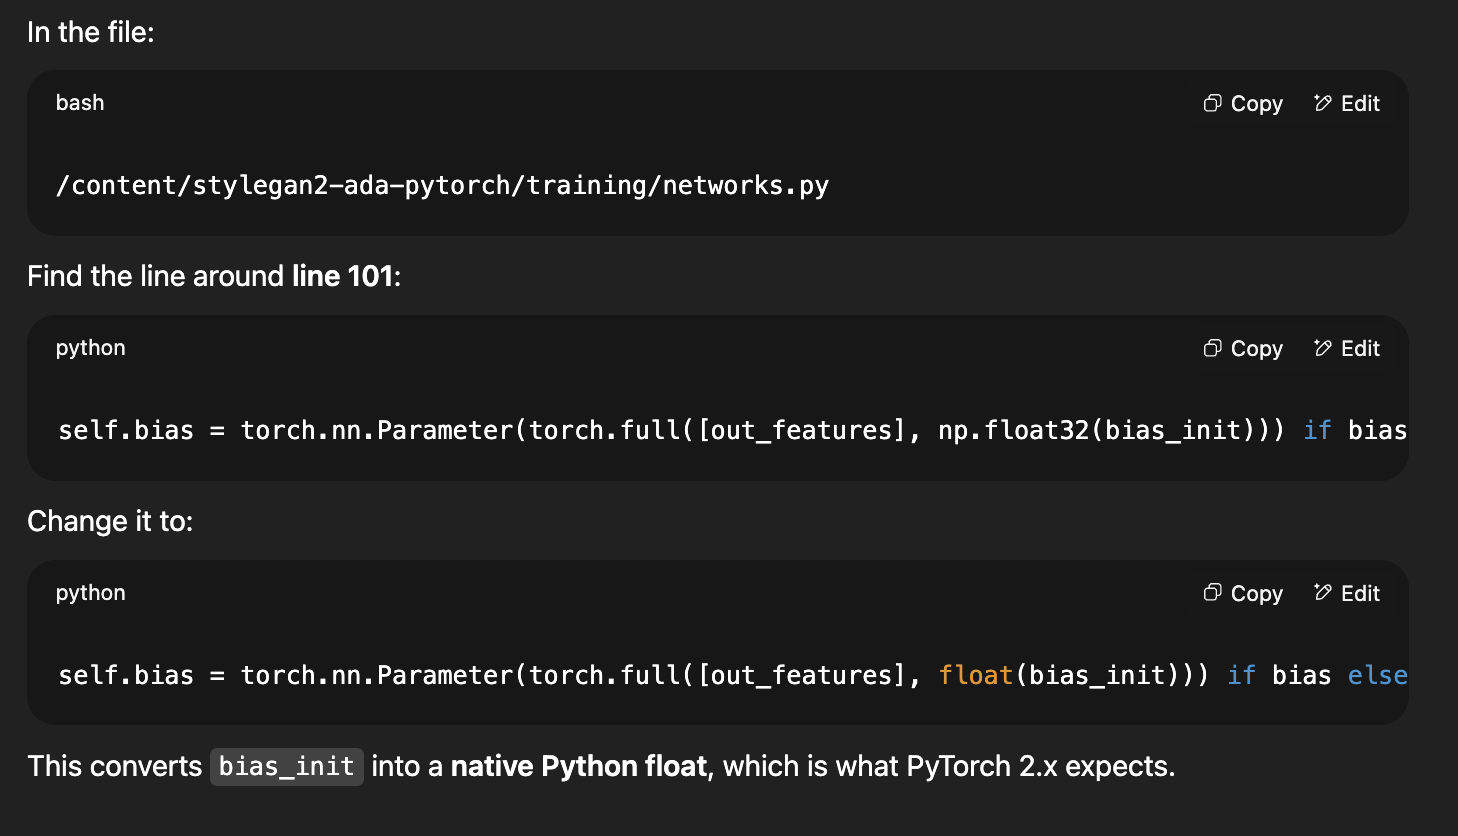

CHANGE THIS

self.bias = torch.nn.Parameter(torch.full([out_features], np.float32(bias_init))) if bias else None

TO THIS

self.bias = torch.nn.Parameter(torch.full([out_features], float(bias_init))) if bias else None


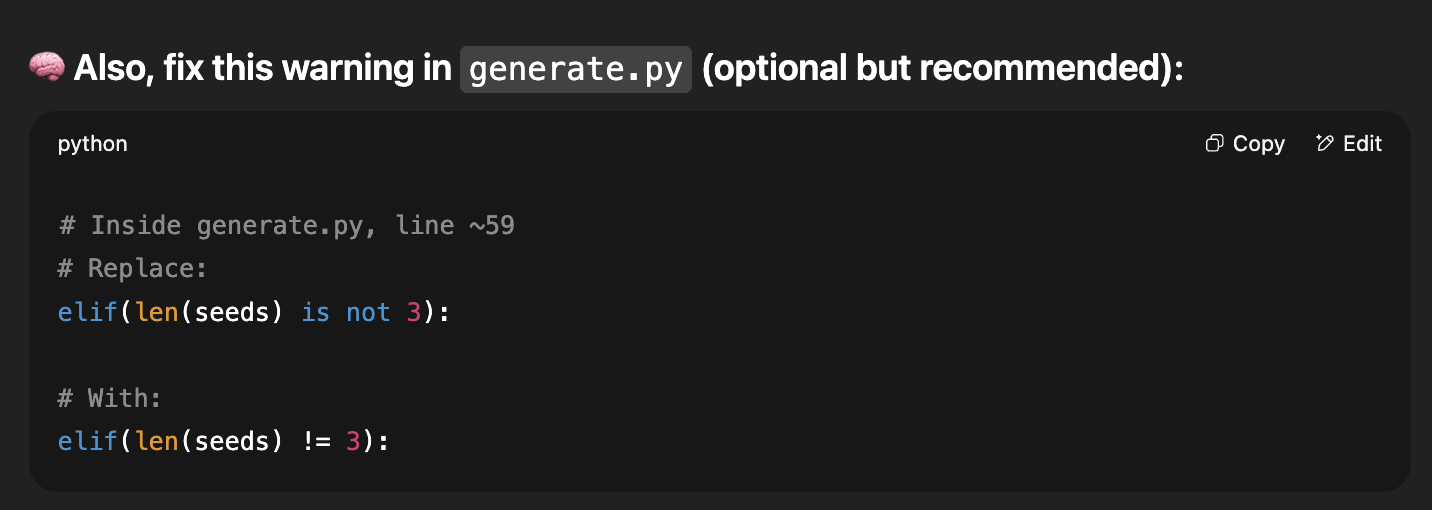

CHANGE SAD TO REQUIRED EMOTION

In [ ]:
# Replace `sad` with any other emotion class like 'happy', 'fear', etc.
!mkdir -p dataset/surprise

# Copy images from your Google Drive (change path accordingly)
!cp /content/stylegan2-ada-pytorch/Dataset/cropped_faces_combined_dataset/surprise/*.jpg dataset/surprise/


In [ ]:
!python dataset_tool.py --source=dataset/surprise --dest=datasets/surprise.zip


100% 449/449 [00:06<00:00, 65.68it/s]


In [ ]:
!python train.py \
  --outdir=training-runs \
  --data=datasets/surprise.zip \
  --gpus=1 \
  --batch=16 \
  --kimg=1600\
  --cfg=auto \
  --snap=10



Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 10,
  "network_snapshot_ticks": 10,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "datasets/surprise.zip",
    "use_labels": false,
    "max_size": 449,
    "xflip": false,
    "resolution": 512
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 32768,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512,
 

In [ ]:
!zip -r training-runs.zip /content/stylegan2-ada-pytorch/training-runs

  adding: content/stylegan2-ada-pytorch/training-runs/ (stored 0%)
  adding: content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/ (stored 0%)
  adding: content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/fakes000400.jpg (deflated 5%)
  adding: content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/events.out.tfevents.1752060274.f2d82011a512.4588.0 (deflated 75%)
  adding: content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/fakes000000.jpg (deflated 4%)
  adding: content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/fakes000760.jpg (deflated 5%)
  adding: content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/network-snapshot-000120.pkl (deflated 7%)
  adding: content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/fakes001520.jpg (deflated 6%)
  adding: content/stylegan2-ada-pytorch/training

AFTER UPLOADING NECESSARY MODEL FILE

In [ ]:
!python generate.py \
  --outdir=generated-surprise-images \
  --trunc=0.7 \
  --seeds=0-3050 \
  --network=/content/stylegan2-ada-pytorch/training-runs/00000-surprise-auto1-kimg1600-batch16/network-snapshot-001600.pkl


/usr/local/lib/python3.11/dist-packages/click/core.py:1193: UserWarning: The parameter --network is used more than once. Remove its duplicate as parameters should be unique.
  parser = self.make_parser(ctx)
/usr/local/lib/python3.11/dist-packages/click/core.py:1193: UserWarning: The parameter --seeds is used more than once. Remove its duplicate as parameters should be unique.
  parser = self.make_parser(ctx)
/usr/local/lib/python3.11/dist-packages/click/core.py:1193: UserWarning: The parameter --trunc is used more than once. Remove its duplicate as parameters should be unique.
  parser = self.make_parser(ctx)
/usr/local/lib/python3.11/dist-packages/click/core.py:1186: UserWarning: The parameter --network is used more than once. Remove its duplicate as parameters should be unique.
  self.parse_args(ctx, args)
/usr/local/lib/python3.11/dist-packages/click/core.py:1186: UserWarning: The parameter --seeds is used more than once. Remove its duplicate as parameters should be unique.
  self.p

TO DOWNLOAD

In [ ]:
!zip -r generated-surprise-images.zip generated-surprise-images

updating: generated-surprise-images/ (stored 0%)
updating: generated-surprise-images/seed0746.png (deflated 0%)
updating: generated-surprise-images/seed0864.png (deflated 0%)
updating: generated-surprise-images/seed0934.png (deflated 0%)
updating: generated-surprise-images/seed0037.png (deflated 0%)
updating: generated-surprise-images/seed0496.png (deflated 0%)
updating: generated-surprise-images/seed0074.png (deflated 0%)
updating: generated-surprise-images/seed0999.png (deflated 0%)
updating: generated-surprise-images/seed0835.png (deflated 0%)
updating: generated-surprise-images/seed0853.png (deflated 0%)
updating: generated-surprise-images/seed0278.png (deflated 0%)
updating: generated-surprise-images/seed0097.png (deflated 0%)
updating: generated-surprise-images/seed0870.png (deflated 0%)
updating: generated-surprise-images/seed0183.png (deflated 0%)
updating: generated-surprise-images/seed0394.png (deflated 0%)
updating: generated-surprise-images/seed0706.png (deflated 0%)
updati